# 02b - Torus Skeletonization Demo

In [8]:
from discos import *
import trimesh
import numpy as np
import networkx as nx

import logging
logging.basicConfig(level=logging.INFO)  # shows level 1 messages by default

# Show detailed (level 2) logs:
logging.getLogger("discos.skeleton").setLevel(logging.DEBUG)

## Create and Visualize Torus

In [9]:
# Create a torus mesh
torus = create_torus_mesh(major_radius=np.pi, minor_radius=np.pi/3, major_segments=24, minor_segments=12)

# Rotate so the torus lies on its side (ensures slices through the hole)
torus.apply_transform(trimesh.transformations.rotation_matrix(
    angle=np.pi / 2,
    direction=[1, 0, 0],
    point=torus.centroid
))

print(f"Torus properties:")
print(f"  Volume: {torus.volume:.3f}")
print(f"  Surface area: {torus.area:.3f}")
print(f"  Z-bounds: {torus.bounds[:, 2]}")

mm = MeshManager(torus)

# Visualize the original torus
fig = mm.visualize_mesh_3d(title="Original Torus", backend="plotly")
fig.show()

Torus properties:
  Volume: 64.200
  Surface area: 127.487
  Z-bounds: [-4.1887902  4.1887902]


In [10]:
mm.visualize_mesh_slice_interactive()

## Skeletonization

INFO:discos.skeleton:Starting skeletonization: n_slices=31, radius_mode=equivalent_area, validate_volume=True, volume_tol=0.050
DEBUG:discos.skeleton:Mesh z-range: zmin=-4.18879, zmax=4.18879 (dz=8.37758)
DEBUG:discos.skeleton:Cut z=-4.18879 (slice 0, probe_offset=0.0135): 1 polygon(s) -> junction_ids=[0]
DEBUG:discos.skeleton:Cut z=4.18879 (slice 30, probe_offset=-0.0135): 1 polygon(s) -> junction_ids=[1]
DEBUG:discos.skeleton:Cut z=-3.91855 (slice 1, probe_offset=0): 1 polygon(s) -> junction_ids=[2]
DEBUG:discos.skeleton:Cut z=-3.6483 (slice 2, probe_offset=0): 1 polygon(s) -> junction_ids=[3]
DEBUG:discos.skeleton:Cut z=-3.37806 (slice 3, probe_offset=0): 1 polygon(s) -> junction_ids=[4]
DEBUG:discos.skeleton:Cut z=-3.10781 (slice 4, probe_offset=0): 1 polygon(s) -> junction_ids=[5]
DEBUG:discos.skeleton:Cut z=-2.83757 (slice 5, probe_offset=0): 1 polygon(s) -> junction_ids=[6]
DEBUG:discos.skeleton:Cut z=-2.56732 (slice 6, probe_offset=0): 1 polygon(s) -> junction_ids=[7]
DEBUG:dis

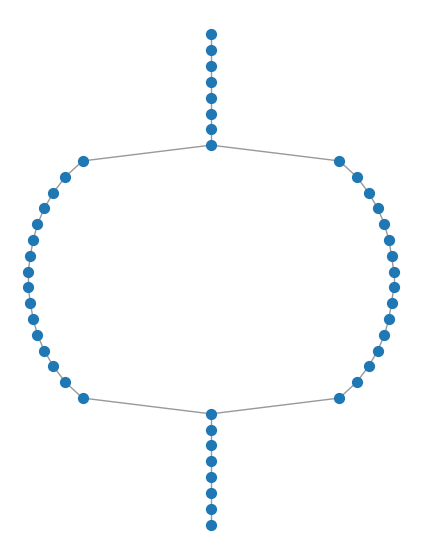

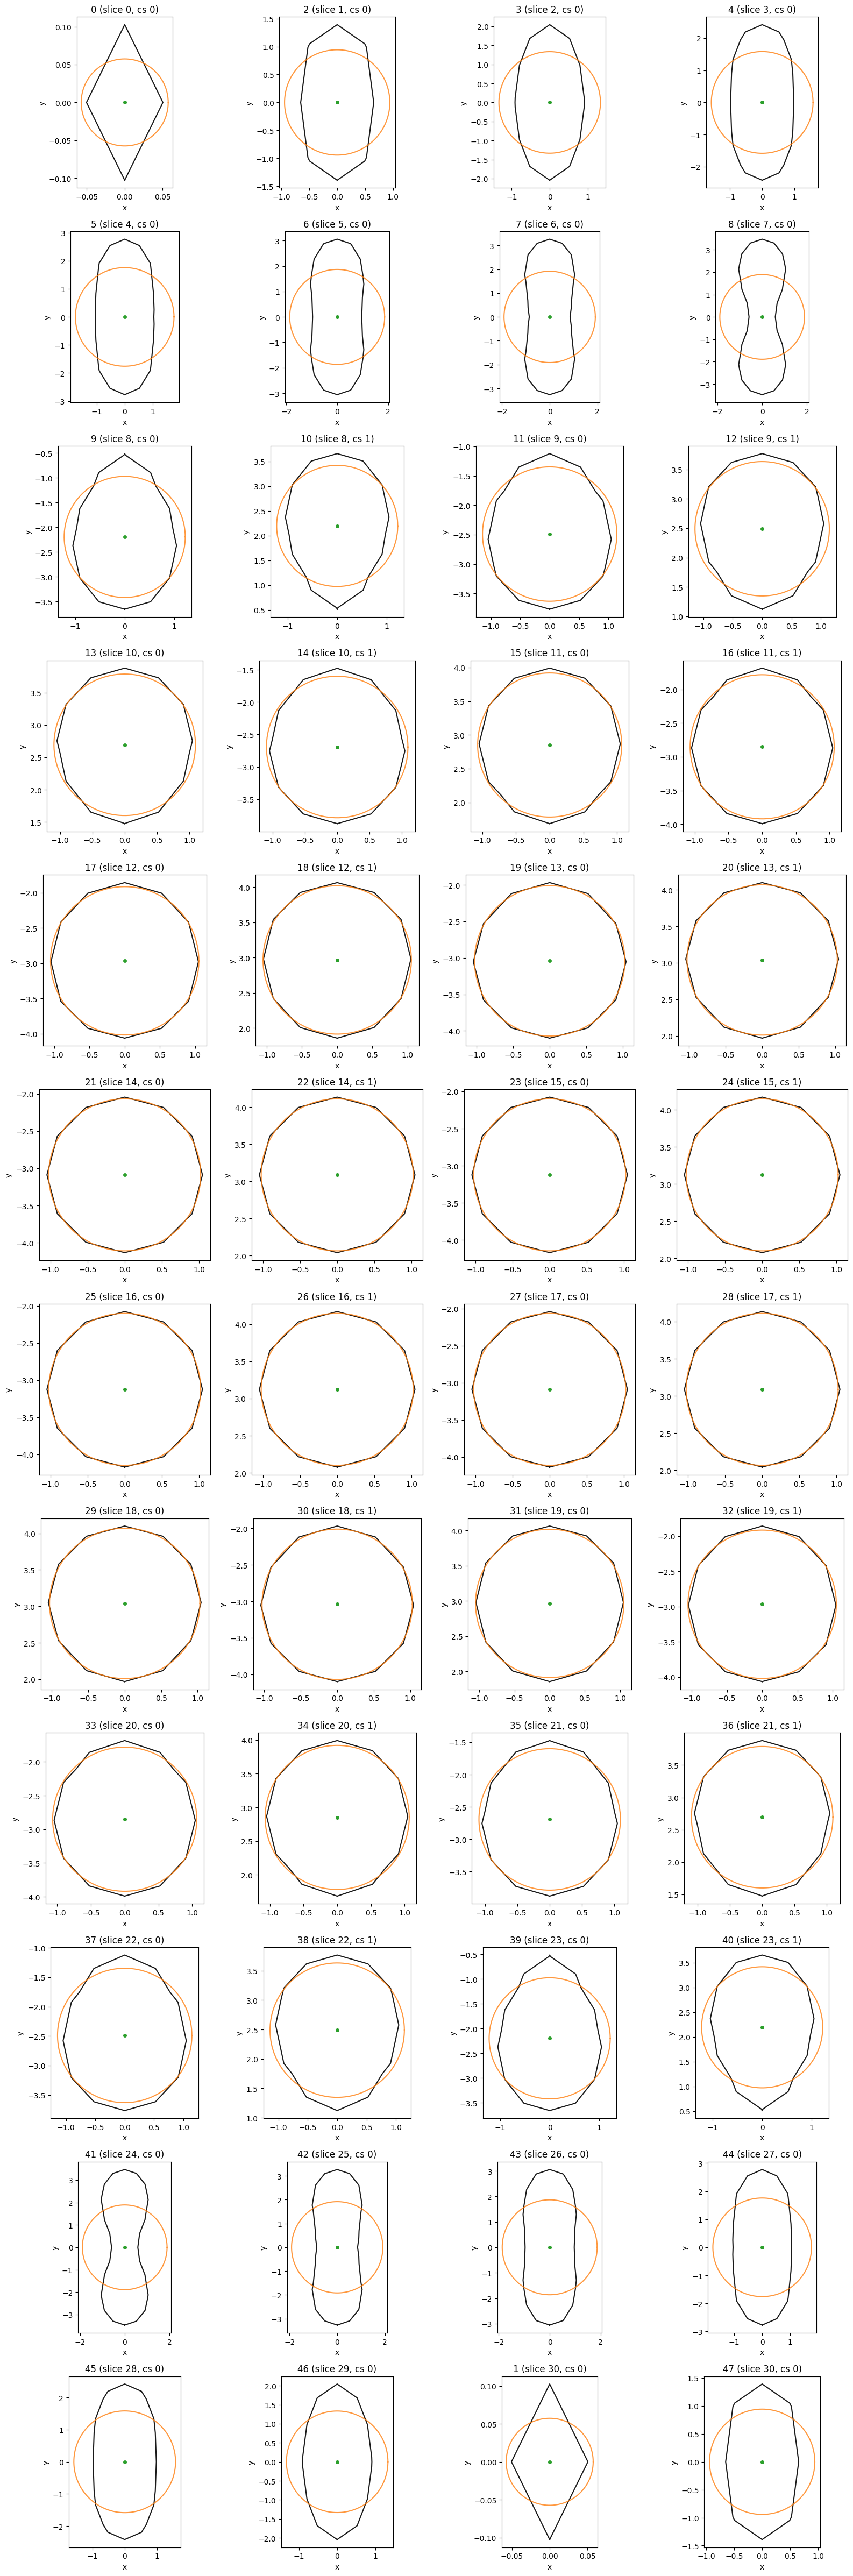

In [11]:
n_slices = 31
G = skeletonize(torus, n_slices=n_slices, verbose=True, verbosity=2, enforce_connected=False)
G.draw(axis='y', figsize=(7, 7))
G.plot_all_cross_sections();

In [12]:
# write swc to file
G.to_swc(data_path(f"swc/demos/torus_n{n_slices}.swc"))

## Summary

The torus segmentation demonstrates:
- **Complex topology**: Middle slices contain multiple segments due to the hole
- **Ring connectivity**: Segments form a circular arrangement in 3D space
- **Genus = 1 handling**: Algorithm correctly identifies separate connected components within slices
- **Spatial relationships**: 3D visualization reveals the donut structure

This showcases the algorithm's ability to handle complex topologies with holes.